In [1]:
import os
import pandas as pd 
import datetime as dt
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import yfinance as yf
from pdb import set_trace as keyboard
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import Image

#width = int(1920/2)
#height = int(1080/2)
#WINDOW_SIZE = "%s, %s" % (width, height)

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.add_argument("--headless")
#chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)
from bs4 import BeautifulSoup

loggedIn = False


In [2]:
if not loggedIn:
    browser = webdriver.Chrome(options=chrome_options, 
                               executable_path='C:/ChromeDriver/chromedriver.exe')
    browser.get('https://eduardocavalcanti.com/login/')


    username = browser.find_element_by_id('input_0')
    username.send_keys("carlosfaria310@gmail.com")

    password = browser.find_element_by_id('input_1')
    password.send_keys("rioclaro")

    time.sleep(1)
    browser.find_element_by_css_selector('[type=submit]').click()
    #browser.find_element_by_id('arm_form_field_container_453').click()

    loggedIn = True
    
print("Connection established")

Connection established


In [3]:
stockTicker = 'itsa4'

time.sleep(2)
browser.get('https://eduardocavalcanti.com/an_fundamentalista/%s' % stockTicker[:4])
time.sleep(2)

In [4]:
#browser.find_element_by_xpath('//div[@class="envelope"][@style="overflow:auto"]')
tableData = browser.find_element_by_xpath('//table[@class="table table-hover table-condensed table-responsive analise"]').text.split('\n')
tableData_preDF = [i.replace(' %', '%').split(' ') for i in tableData[1:]]

In [5]:
cols = ['Ano', 'Patrim. Líq.', 'Receita Líq.', 'EBITDA', 'D&A', 'EBIT', 'Mrg. EBIT', 'Result. Fin.', 
       'Impostos', '%% Impostos', 'Lucro Líq.', 'Margem Líq.', 'ROE', 'Caixa', 'Dívida Bruta', 
       'Dívida Líq.', 'Dív. Bru./PL', 'Dív.Líq./EBITDA', 'FCO', 'CAPEX', 'FCF', 'FCL ex-CAPEX', 
       'CAPEX/FCO', 'Proventos', 'Payout', '%% Anual']
fund_df1 = pd.DataFrame(tableData_preDF, columns=cols)
fund_df1 = fund_df1.set_index(fund_df1.iloc[:,0])
fund_df1.drop("Ano", axis=1, inplace=True)
fund_df1.index.name = None

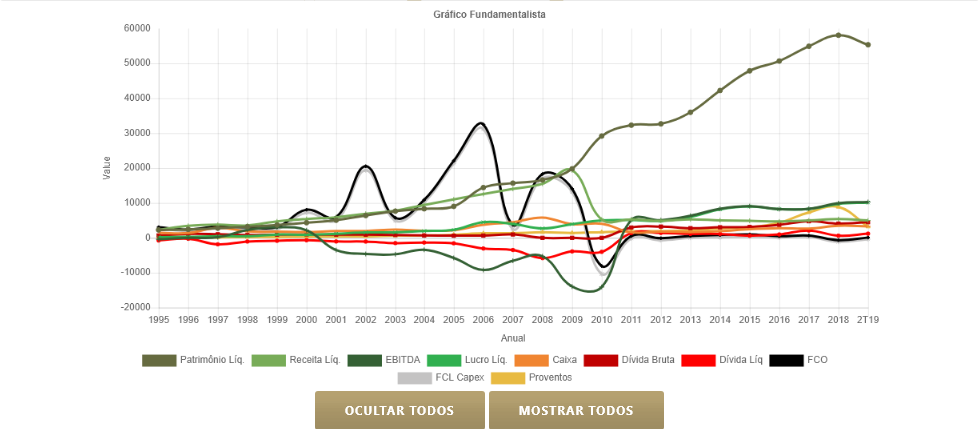

In [21]:
#browser.find_element_by_xpath('//canvas[@id="canvas" and @class="chartjs-render-monitor"]')
browser.set_window_size(1000, 700)
img = browser.find_element_by_xpath('//div[@style="width:100%;"]')
_ = img.screenshot("screenshot.png")


Image(filename='screenshot.png')